In [21]:
import os

# Since notebook is in notebooks/ folder, go UP one level to project root
BASE_DIR = os.path.dirname(os.getcwd())  # Go up from notebooks/ to project root
RESULTS_DIR = os.path.join(BASE_DIR, 'results')
DATA_DIR = os.path.join(BASE_DIR, 'data')

# Create results folder
os.makedirs(RESULTS_DIR, exist_ok=True)

print(f"✓ Base directory: {BASE_DIR}")
print(f"✓ Results directory: {RESULTS_DIR}")
print(f"✓ Data directory: {DATA_DIR}")

# Verify paths
print(f"\n✓ Current working dir: {os.getcwd()}")
print(f"✓ Data file path: {os.path.join(DATA_DIR, 'spy_vix_combined.csv')}")




✓ Base directory: /Users/aarushburra/Documents/regime-lstm-option-pricing
✓ Results directory: /Users/aarushburra/Documents/regime-lstm-option-pricing/results
✓ Data directory: /Users/aarushburra/Documents/regime-lstm-option-pricing/data

✓ Current working dir: /Users/aarushburra/Documents/regime-lstm-option-pricing/notebooks
✓ Data file path: /Users/aarushburra/Documents/regime-lstm-option-pricing/data/spy_vix_combined.csv


In [22]:
"""
Data Exploration: SPY Options and VIX (2020-2024)
Author: [Your Name]
Date: December 29, 2025

This notebook explores the cleaned SPY/VIX dataset to understand:
1. Price movements over time
2. Regime distribution (low vs high volatility)
3. Relationship between VIX and realized volatility
4. Return distributions by regime
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plot style
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

# Load data
df = pd.read_csv(os.path.join(DATA_DIR, 'spy_vix_combined.csv'), index_col=0, parse_dates=True)

print("Dataset Overview:")
print(f"Date range: {df.index[0]} to {df.index[-1]}")
print(f"Total rows: {len(df)}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst 5 rows:")
display(df.head())

print(f"\nBasic Statistics:")
display(df.describe())


Dataset Overview:
Date range: 2020-02-14 00:00:00 to 2024-12-30 00:00:00
Total rows: 1227

Columns: ['Close_SPY', 'Returns_SPY', 'Close_VIX', 'Regime', 'RealizedVol_30d']

First 5 rows:


,Close_SPY,Returns_SPY,Close_VIX,Regime,RealizedVol_30d
Date,,,,,
2020-02-14,309.364288,0.001602,13.68,Low,0.117955
2020-02-18,308.567017,-0.002577,14.83,Low,0.115551
2020-02-19,310.042419,0.004781,14.38,Low,0.115755
2020-02-20,308.768738,-0.004108,15.56,Low,0.116235
2020-02-21,305.588959,-0.010298,17.08,Low,0.120467



Basic Statistics:


,Close_SPY,Returns_SPY,Close_VIX,RealizedVol_30d
count,1227.000000,1227.000000,1227.000000,1227.000000
mean,408.513608,0.000605,21.587930,0.178859
std,79.749981,0.013338,8.284523,0.114660
min,205.504623,-0.109424,11.860000,0.068597
25%,363.986603,-0.005171,16.105000,0.113575
50%,401.344971,0.000854,19.850000,0.145570
75%,441.135895,0.007429,25.230000,0.205748
max,598.740112,0.090603,82.690002,0.821383


✓ Plot saved successfully to: /Users/aarushburra/Documents/regime-lstm-option-pricing/results/spy_price_by_regime.png


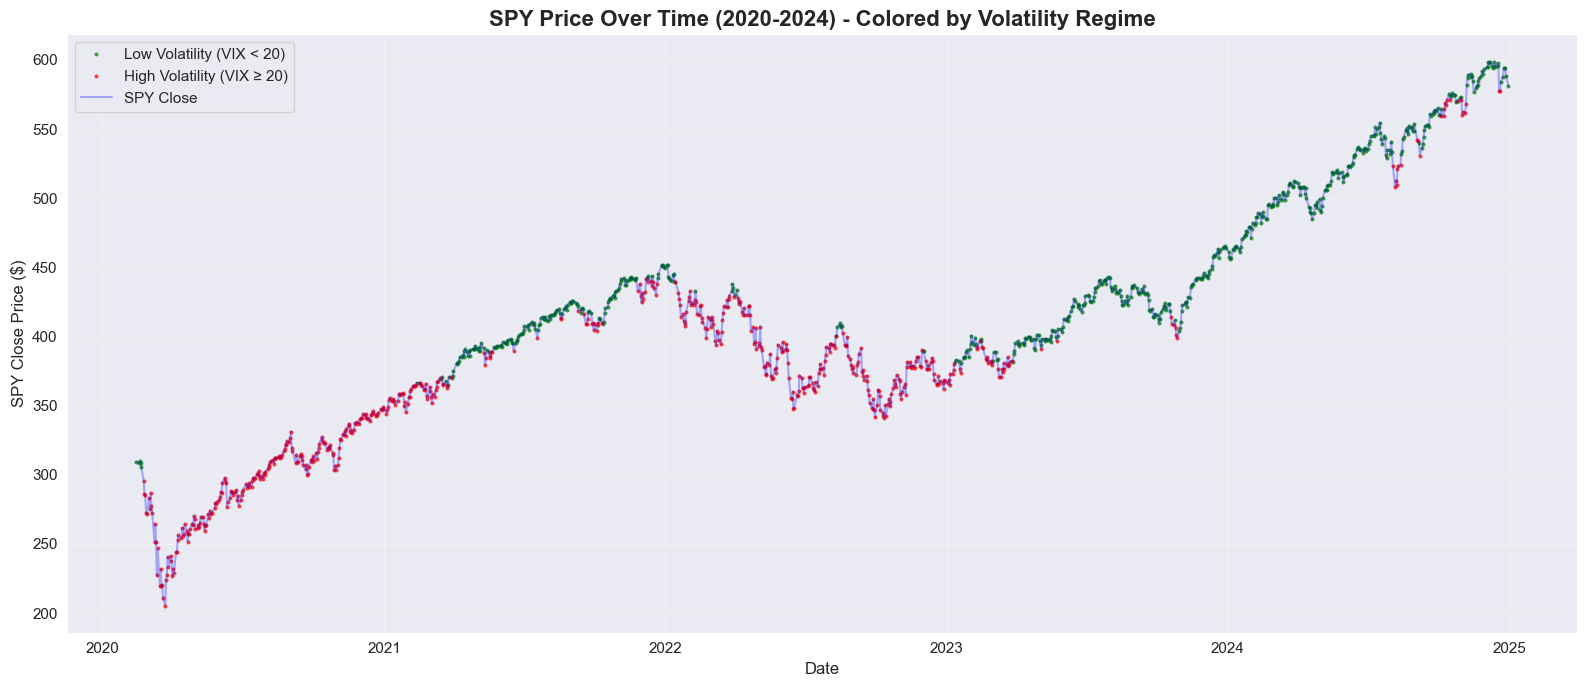

✓ Plot saved to results/spy_price_by_regime.png


In [23]:
# Plot 1: SPY Price Over Time (Color-coded by Regime)

fig, ax = plt.subplots(figsize=(16, 7))

# Separate data by regime
low_vol = df[df['Regime'] == 'Low']
high_vol = df[df['Regime'] == 'High']

# Plot price with different colors for each regime
ax.plot(low_vol.index, low_vol['Close_SPY'], 'o', markersize=2, 
        color='green', alpha=0.6, label='Low Volatility (VIX < 20)')
ax.plot(high_vol.index, high_vol['Close_SPY'], 'o', markersize=2, 
        color='red', alpha=0.6, label='High Volatility (VIX ≥ 20)')

# Add trend line
ax.plot(df.index, df['Close_SPY'], color='blue', linewidth=1.5, alpha=0.3, label='SPY Close')

ax.set_title('SPY Price Over Time (2020-2024) - Colored by Volatility Regime', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('SPY Close Price ($)', fontsize=12)
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
results_dir = os.path.join(os.path.dirname(os.getcwd()), 'results')
plt.savefig(os.path.join(RESULTS_DIR, 'spy_price_by_regime.png'), dpi=150, bbox_inches='tight')


# Debug: Check if file was saved
save_path = os.path.join(RESULTS_DIR, 'spy_price_by_regime.png')
if os.path.exists(save_path):
    print(f"✓ Plot saved successfully to: {save_path}")
else:
    print(f"❌ File NOT saved. Tried to save to: {save_path}")
    print(f"   Current directory: {os.getcwd()}")
    print(f"   Does results folder exist? {os.path.exists(RESULTS_DIR)}")


plt.show()

print("✓ Plot saved to results/spy_price_by_regime.png")


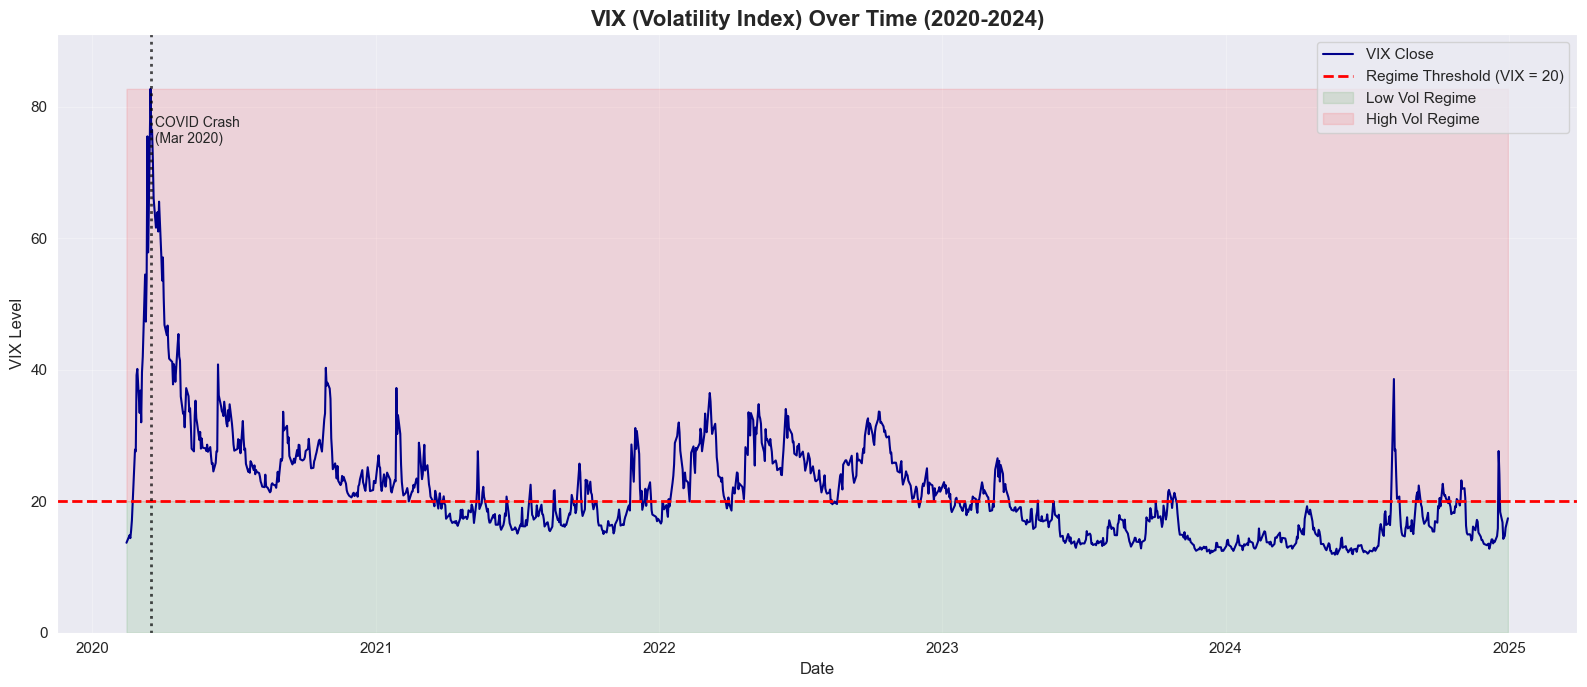

✓ Plot saved to results/vix_over_time.png


In [24]:
# Plot 2: VIX Over Time with Regime Threshold

fig, ax = plt.subplots(figsize=(16, 7))

# Plot VIX
ax.plot(df.index, df['Close_VIX'], color='darkblue', linewidth=1.5, label='VIX Close')

# Add horizontal line at threshold
ax.axhline(y=20, color='red', linestyle='--', linewidth=2, label='Regime Threshold (VIX = 20)')

# Shade regions
ax.fill_between(df.index, 0, 20, alpha=0.1, color='green', label='Low Vol Regime')
ax.fill_between(df.index, 20, df['Close_VIX'].max(), alpha=0.1, color='red', label='High Vol Regime')

# Highlight major events
covid_crash = pd.Timestamp('2020-03-16')
if covid_crash in df.index:
    ax.axvline(x=covid_crash, color='black', linestyle=':', linewidth=2, alpha=0.7)
    ax.text(covid_crash, df['Close_VIX'].max() * 0.9, ' COVID Crash\n (Mar 2020)', 
            fontsize=10, ha='left')

ax.set_title('VIX (Volatility Index) Over Time (2020-2024)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('VIX Level', fontsize=12)
ax.set_ylim(0, df['Close_VIX'].max() * 1.1)
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/vix_over_time.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Plot saved to results/vix_over_time.png")



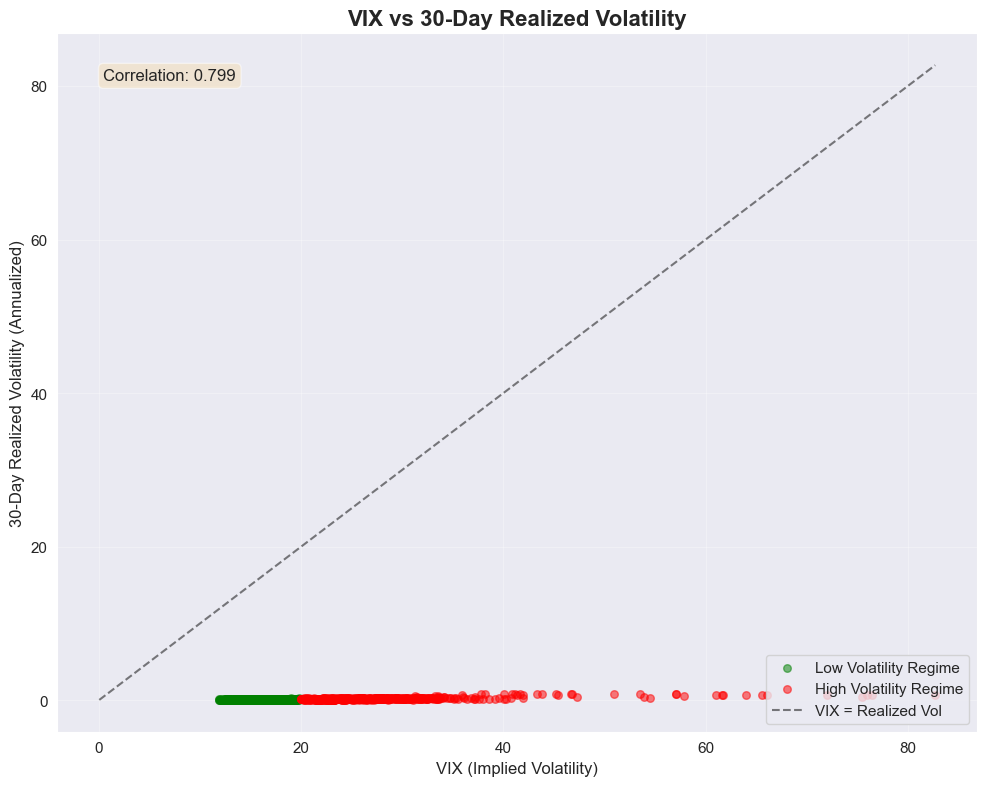

✓ Plot saved to results/vix_vs_realized_vol.png

📊 Key Finding: VIX and realized volatility have a correlation of 0.799


In [25]:
# Plot 3: VIX vs Realized Volatility (Scatter Plot)

fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot colored by regime
colors = {'Low': 'green', 'High': 'red'}
for regime in ['Low', 'High']:
    subset = df[df['Regime'] == regime]
    ax.scatter(subset['Close_VIX'], subset['RealizedVol_30d'], 
               alpha=0.5, s=30, color=colors[regime], 
               label=f'{regime} Volatility Regime')

# Add diagonal reference line (VIX = Realized Vol)
min_val = min(df['Close_VIX'].min(), df['RealizedVol_30d'].min())
max_val = max(df['Close_VIX'].max(), df['RealizedVol_30d'].max())
ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1.5, alpha=0.5, label='VIX = Realized Vol')

# Calculate correlation
correlation = df['Close_VIX'].corr(df['RealizedVol_30d'])
ax.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
        transform=ax.transAxes, fontsize=12, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax.set_title('VIX vs 30-Day Realized Volatility', fontsize=16, fontweight='bold')
ax.set_xlabel('VIX (Implied Volatility)', fontsize=12)
ax.set_ylabel('30-Day Realized Volatility (Annualized)', fontsize=12)
ax.legend(loc='lower right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/vix_vs_realized_vol.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Plot saved to results/vix_vs_realized_vol.png")
print(f"\n📊 Key Finding: VIX and realized volatility have a correlation of {correlation:.3f}")


# Summary Statistics by Regime

print("="*70)
print("REGIME COMPARISON: Low Volatility (VIX < 20) vs High Volatility (VIX ≥ 20)")
print("="*70)

for regime in ['Low', 'High']:
    subset = df[df['Regime'] == regime]
    
    print(f"\n{'─'*70}")
    print(f"📊 {regime.upper()} VOLATILITY REGIME")
    print(f"{'─'*70}")
    print(f"Number of days: {len(subset)}")
    print(f"Percentage of total: {len(subset)/len(df)*100:.1f}%")
    print(f"\nReturns:")
    print(f"  Mean daily return: {subset['Returns_SPY'].mean()*100:.3f}%")
    print(f"  Std deviation: {subset['Returns_SPY'].std()*100:.3f}%")
    print(f"  Sharpe ratio (annualized): {(subset['Returns_SPY'].mean() / subset['Returns_SPY'].std()) * np.sqrt(252):.3f}")
    print(f"\nVolatility:")
    print(f"  Mean VIX: {subset['Close_VIX'].mean():.2f}")
    print(f"  Mean realized vol (30d): {subset['RealizedVol_30d'].mean():.2%}")
    print(f"  Max VIX: {subset['Close_VIX'].max():.2f}")

print("\n" + "="*70)

# Calculate regime persistence
regime_changes = (df['Regime'] != df['Regime'].shift()).sum()
print(f"\n🔄 Regime Changes: {regime_changes} times over {len(df)} days")
print(f"   Average regime duration: {len(df) / regime_changes:.1f} days")
